Upload kaggle.json

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:09<00:00, 263MB/s]
100% 1.06G/1.06G [00:09<00:00, 122MB/s]


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout

In [6]:
# generator: work around on limitation of loading all images in ram
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize: to get better prediction as image data will be in 0 to 1
def process(image,label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [8]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

Runtime >> Change Runtime Type >>

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 113ms/step - loss: 1.0766 - accuracy: 0.5939 - val_loss: 0.5972 - val_accuracy: 0.6816
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5510 - accuracy: 0.7240 - val_loss: 0.6213 - val_accuracy: 0.6702
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4828 - accuracy: 0.7728 - val_loss: 0.6608 - val_accuracy: 0.6806
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4055 - accuracy: 0.8195 - val_loss: 0.7887 - val_accuracy: 0.6534
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3604 - accuracy: 0.8422 - val_loss: 0.6217 - val_accuracy: 0.7552
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2714 - accuracy: 0.8840 - val_loss: 0.4863 - val_accuracy: 0.7910
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.1982 - accuracy: 0.9202 - val_loss: 0.7525 - val_ac

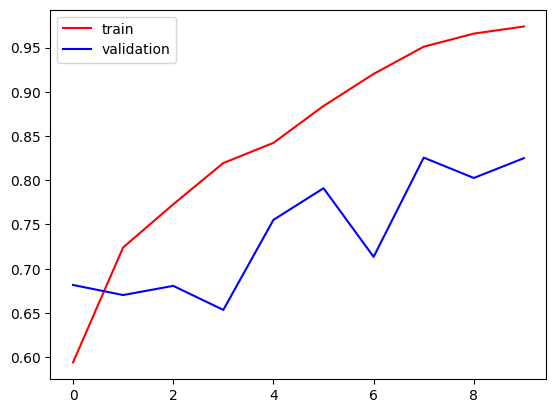

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

Above graph is showing overfitting

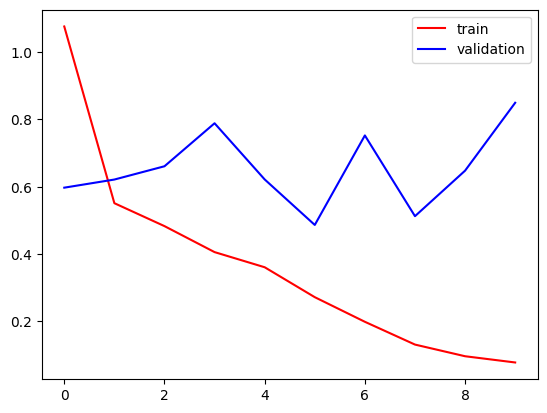

In [13]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

increase in gap is clear indication of overfitting

giving good results in training data but not in test data

# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularization
# Dropout
# Batch Norm
# Reduce complexity

In [15]:
import cv2

In [16]:
test_img = cv2.imread('/content/dog.jpg')

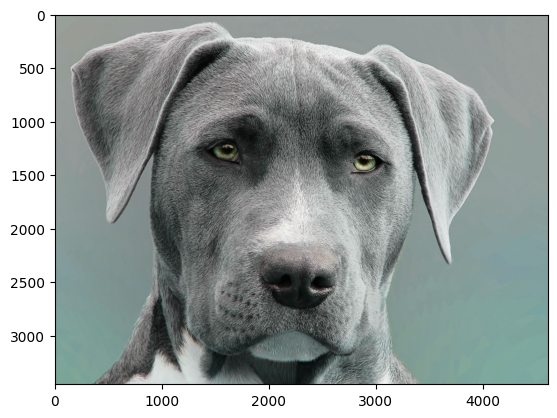

In [17]:
plt.imshow(test_img)

In [20]:
test_img.shape

(3456, 4608, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input = test_img.reshape((1,256,256,3))

0 for cat & 1. for dog

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 361ms/step


array([[1.]], dtype=float32)